In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('students.csv')

# Pisahkan fitur dan label
X = data.drop('Target', axis=1)  # 'target' adalah kolom label
y = data['Target']

# Standarisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Menentukan kelas yang ada
classes = np.unique(y)

# Menghitung mean untuk setiap kelas
mean_vectors = []
for class_value in classes:
    class_data = X_scaled[y == class_value]
    mean_vectors.append(np.mean(class_data, axis=0))

# Menampilkan mean vector per kelas
mean_vectors = np.array(mean_vectors)
print("Mean Vectors per Class:\n", mean_vectors)


Mean Vectors per Class:
 [[ 0.12527846  0.29161444 -0.11764244 -0.00849615 -0.10535051  0.12816538
   0.00476635  0.0604187   0.00480012 -0.0800391  -0.09131431 -0.15723919
   0.00904394  0.33315702 -0.55126224  0.31414017 -0.39027404  0.33318468
  -0.00770687 -0.05847548 -0.20082832 -0.0745422  -0.69183186 -0.64825111
   0.09306483 -0.06533538 -0.22803752 -0.14866827 -0.81540883 -0.75475753
   0.12803112 -0.00523425  0.03781064 -0.06266493]
 [-0.08058882 -0.18758901  0.07567673  0.00546538  0.06776961 -0.08244591
  -0.00306609 -0.03886599 -0.00308781  0.05148735  0.05874044  0.10114843
  -0.00581776 -0.21431242  0.3546146  -0.2020793   0.25105451 -0.21433021
   0.00495766  0.03761596  0.12918834  0.04795132  0.44503987  0.41700535
  -0.05986651  0.04202878  0.14669141  0.09563495  0.52453415  0.48551854
  -0.08235954  0.00336707 -0.02432273  0.04031094]]


In [5]:
# Mean global dari seluruh data
mean_global = np.mean(X_scaled, axis=0)

# Matriks scatter antar kelas
S_B = np.zeros((X_scaled.shape[1], X_scaled.shape[1]))  # Matriks n x n
for class_value, mean_vector in zip(classes, mean_vectors):
    # Membuat data kelas
    class_data = X_scaled[y == class_value]
    
    # Menghitung scatter antar kelas
    n_class = class_data.shape[0]
    mean_diff = (mean_vector - mean_global).reshape(-1, 1)
    S_B += n_class * (mean_diff).dot(mean_diff.T)

# Menampilkan matriks scatter antar kelas
print("\nBetween-Class Scatter Matrix:\n", S_B)



Between-Class Scatter Matrix:
 [[ 3.66486352e+01  8.53081295e+01 -3.44148134e+01 ... -1.53121275e+00
   1.10610263e+01 -1.83318362e+01]
 [ 8.53081295e+01  1.98574296e+02 -8.01083953e+01 ... -3.56424992e+00
   2.57470834e+01 -4.26715660e+01]
 [-3.44148134e+01 -8.01083953e+01  3.23171483e+01 ...  1.43788167e+00
  -1.03868304e+01  1.72144670e+01]
 ...
 [-1.53121275e+00 -3.56424992e+00  1.43788167e+00 ...  6.39754376e-02
  -4.62139571e-01  7.65920508e-01]
 [ 1.10610263e+01  2.57470834e+01 -1.03868304e+01 ... -4.62139571e-01
   3.33835907e+00 -5.53278239e+00]
 [-1.83318362e+01 -4.26715660e+01  1.72144670e+01 ...  7.65920508e-01
  -5.53278239e+00  9.16967896e+00]]


In [6]:
# Matriks scatter dalam kelas
S_W = np.zeros((X_scaled.shape[1], X_scaled.shape[1]))  # Matriks n x n
for class_value in classes:
    # Mengambil data kelas
    class_data = X_scaled[y == class_value]
    
    # Menghitung scatter dalam kelas
    mean_vector = np.mean(class_data, axis=0)
    class_scatter = np.dot((class_data - mean_vector).T, (class_data - mean_vector))
    S_W += class_scatter

# Menampilkan matriks scatter dalam kelas
print("\nWithin-Class Scatter Matrix:\n", S_W)



Within-Class Scatter Matrix:
 [[ 3593.3513648    769.7539584   -438.82996508 ...   -67.28857093
     32.25206732   -84.72708875]
 [  769.7539584   3431.42570356  -814.20987527 ...   278.64289248
   -126.18016149   -11.77297365]
 [ -438.82996508  -814.20987527  3597.68285167 ...  -363.59321091
     -4.95965521   102.68980285]
 ...
 [  -67.28857093   278.64289248  -363.59321091 ...  3629.93602456
   -107.22655557 -1241.29045706]
 [   32.25206732  -126.18016149    -4.95965521 ...  -107.22655557
   3626.66164093  -451.07998032]
 [  -84.72708875   -11.77297365   102.68980285 ... -1241.29045706
   -451.07998032  3620.83032104]]


In [7]:
# Matriks invers dari S_W
S_W_inv = np.linalg.inv(S_W)

# Matriks scatter untuk eigen analisis
S_W_inv_S_B = np.dot(S_W_inv, S_B)

# Menghitung eigenvalue dan eigenvector
eigenvalues, eigenvectors = np.linalg.eig(S_W_inv_S_B)

# Menampilkan eigenvalue dan eigenvector
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)



Eigenvalues:
 [-2.22044605e-16+0.00000000e+00j  1.96583993e+00+0.00000000e+00j
 -4.95381623e-16+1.22300058e-16j -4.95381623e-16-1.22300058e-16j
 -3.00857829e-16+0.00000000e+00j  1.97098069e-16+1.88706009e-16j
  1.97098069e-16-1.88706009e-16j  1.18061486e-17+1.11577563e-16j
  1.18061486e-17-1.11577563e-16j  8.81667725e-17+5.21885312e-18j
  8.81667725e-17-5.21885312e-18j -6.43323890e-17+3.78226633e-17j
 -6.43323890e-17-3.78226633e-17j -4.03437733e-17+0.00000000e+00j
  1.54057295e-17+2.73776322e-17j  1.54057295e-17-2.73776322e-17j
 -1.41773673e-17+1.95147856e-17j -1.41773673e-17-1.95147856e-17j
 -1.32994450e-17+0.00000000e+00j -5.15536356e-18+7.21082296e-18j
 -5.15536356e-18-7.21082296e-18j  8.08448269e-18+1.03800303e-18j
  8.08448269e-18-1.03800303e-18j -2.63018818e-18+3.47588788e-18j
 -2.63018818e-18-3.47588788e-18j  1.45016783e-18+4.06075461e-18j
  1.45016783e-18-4.06075461e-18j  3.79559823e-18+0.00000000e+00j
  1.72508581e-18+0.00000000e+00j -7.83882073e-19+1.17919309e-18j
 -7.838820

In [8]:
# Urutkan eigenvalue dan eigenvector berdasarkan nilai eigenvalue terbesar
sorted_indices = np.argsort(eigenvalues)[::-1]  # Mengurutkan secara menurun
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Pilih eigenvector dengan eigenvalue terbesar
lda_components = eigenvectors_sorted[:, :1]  # Misalnya memilih 1 komponen

print("\nEigenvectors (LDA Components):\n", lda_components)



Eigenvectors (LDA Components):
 [[ 8.64911685e-03+0.j]
 [-2.99787264e-02+0.j]
 [-8.19881073e-03+0.j]
 [-6.66309176e-02+0.j]
 [-1.39505682e-02+0.j]
 [ 3.46309878e-02+0.j]
 [-5.40300639e-02+0.j]
 [-1.84031878e-02+0.j]
 [ 1.55334139e-02+0.j]
 [ 3.83233738e-02+0.j]
 [ 4.76976026e-04+0.j]
 [-2.50854873e-02+0.j]
 [-1.01336999e-02+0.j]
 [-6.88309145e-02+0.j]
 [ 1.27993499e-01+0.j]
 [-3.49631912e-02+0.j]
 [ 5.92094650e-02+0.j]
 [-2.39949987e-02+0.j]
 [ 7.12723976e-02+0.j]
 [-1.59272237e-01+0.j]
 [ 3.47281814e-02+0.j]
 [-3.73480959e-02+0.j]
 [ 3.23629767e-01+0.j]
 [-4.29190936e-02+0.j]
 [ 1.66184149e-02+0.j]
 [-1.43821508e-01+0.j]
 [-3.59427352e-01+0.j]
 [-6.78116258e-02+0.j]
 [ 8.13527581e-01+0.j]
 [-6.26648769e-02+0.j]
 [ 2.06622408e-02+0.j]
 [-1.16738171e-02+0.j]
 [ 1.23482082e-02+0.j]
 [ 1.25714471e-02+0.j]]


In [9]:
# Proyeksikan data ke ruang LDA (dimensi lebih rendah)
X_lda = X_scaled.dot(lda_components)

# Menampilkan hasil proyeksi
print("\nProyeksi Data ke Ruang LDA:\n", X_lda)



Proyeksi Data ke Ruang LDA:
 [[-0.19419512+0.j]
 [ 0.13160377+0.j]
 [-1.39814412+0.j]
 ...
 [-0.81717761+0.j]
 [ 0.61458993+0.j]
 [ 0.77792871+0.j]]


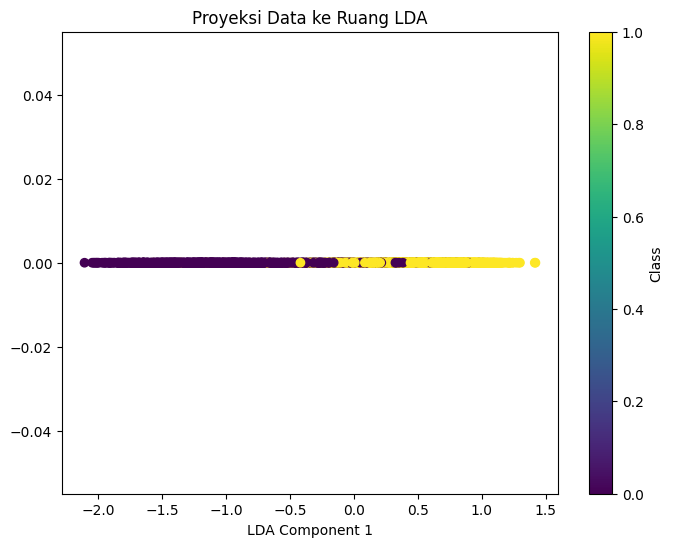

In [14]:
# Memastikan X_lda hanya berisi bagian real
X_lda_real = np.real(X_lda)

# Visualisasi data proyeksi LDA
plt.figure(figsize=(8, 6))
plt.scatter(X_lda_real, np.zeros_like(X_lda_real), c=y_encoded, cmap='viridis', marker='o')
plt.title('Proyeksi Data ke Ruang LDA')
plt.xlabel('LDA Component 1')
plt.colorbar(label='Class')
plt.show()


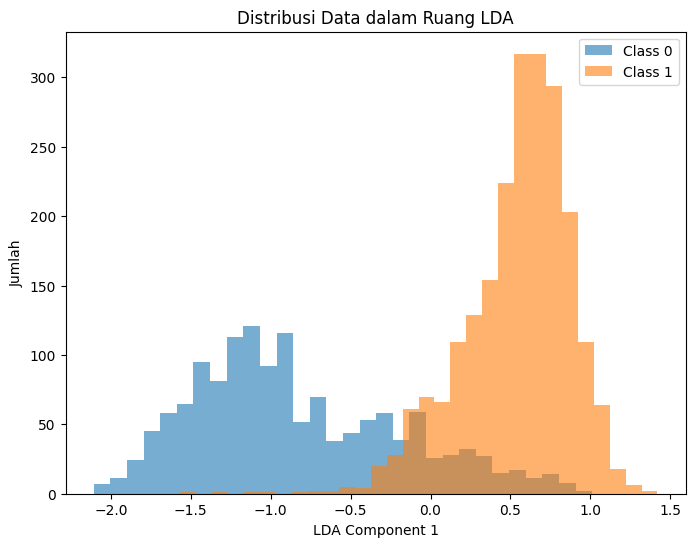

In [15]:
plt.figure(figsize=(8, 6))
for label in np.unique(y_encoded):
    plt.hist(X_lda_real[y_encoded == label], bins=30, alpha=0.6, label=f'Class {label}')
plt.title('Distribusi Data dalam Ruang LDA')
plt.xlabel('LDA Component 1')
plt.ylabel('Jumlah')
plt.legend()
plt.show()
